# Исследование рынка игр


**Описание проекта:** В современном мире игры стали неотъемлемой частью нашей жизни. Каждый человек, будь то ребенок, играющий в God of War на Sony PlayStation, или взрослый человек, играющий в Тетрис на телефоне, уже не может себе представить мир без этих технологий. Эта индустрия всё больше растет, всё больше денег вливаются в эти проекты. А сами игры уже сложно отличить от фильмов. Используя данных из открытых источников мы попробуем проанализировать рынок игр, сравним различные характеристики, выявим тенденции

**Цель исследования:** Выявить определяющие успешность игры закономерности для определения, на какой потенциально популярный продукт сделать ставку, и для планирования рекламной кампании

**Описание данных:**   
Датасет с данными по играм, их продажам

**Ход исследования:**  
 - [1. Загрузка данных](#загрузка)  
 - [2. Предобработка данных](#предобработка)  
 - [3. Исследовательский анализ данных](#исслед)  
 - [4. Составьте портрет пользователя каждого региона](#портрет)  
 - [5. Проверьте гипотезы](#гипотезы)  
 - [6. Вывод](#вывод)  

**Общий вывод:** 
Был проанализирован рынок видеоигр до 2017 года, в особенности на таких приставках, как PS4, PS3, XOne. Посмотрели на тенденции всех приставок, цикл жизни. Проанализировали график выпуска игр за всё время наблюдения. Проверили корреляцию между оценками (критиков и игроков) и продажами игр. Нашли три жанра, которые сейчас в "топе" - Action, Shooter и Sports, посмотрели на особенности каждого из них. Однако в Японии другой жанр на первом месте - Role-Playing. Как и другая приставка - 3DS. Есть отличия и в системе возрастного рейтинга. И проверили 2 гипотезы: есть основания утверждать, что оценки игроков на платформах PC и Xone не отличаются, а вот оценки игроков по жанрам Action и Sport имеют различия.

По итогам исследования советовал бы обратить внимание на 2 популярные платформы - PS4 и XOne. Так же обратил бы внимание на график - медианные продажи на одну игру по жанрам. Хорошо видно, какие игры лучше покупают игроки. Стоит обратить внимание на то, в каком регионе настроены работать наши маркетологи. В зависимости от региона различаются предпочтения игроков - во что играть и на какой приставке

<a id="загрузка"></a>
## Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
try:
    df = pd.read_csv('/datasets/games.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
    
display(df.head())
print(df.shape)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


(16715, 11)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
df.duplicated().sum()

0

**Вывод по разделу:**  
У нас файл с данными о продажах игр, оценки пользователей и экспертов, жанры и платформы. В файле 16715 строк и 11 колонок. Тип данных в некоторых колонках нужно подкорректировать (например, Year_of_Release). Также нужно переименовать колонки - убрать заглавные буквы. Дубликатов нет, зато есть много пропусков, особенно в столбцах с рейтингом или оценкой

<a id="предобработка"></a>
## Предобработка данных

Первым делом переименуем столбцы. Изменим тип данных в year и critic_score на int, так как там целые числа

In [7]:
df.columns = df.columns.str.lower()

df['year_of_release'] = df['year_of_release'].astype('Int64')
df['critic_score'] = df['critic_score'].astype('Int64')

В столбце user_score есть значения 'tbd' - tbd расшифровывается как "to be determined" или "будет определено". Это значит, что информация, детали или решение будут уточнены позже. Поэтому мы не можем знать, какое значение там будет. Сначала изменим значения на NaN, а далее переведем object в float, так как там есть дробные значения

In [8]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [9]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan
df['user_score'] = df['user_score'].astype('float')

Удалим 2 игры без названия из данных

In [10]:
df = df.dropna(subset = ['name'])
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,NaN


Строки с пропусками в годах удаляем, их всего 269 (меньше 2%)

In [11]:
df = df.dropna(subset = ['year_of_release']).reset_index(drop = True)
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,NaN
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,NaN


In [12]:
df['all_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN,31.38


In [13]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
all_sales             0
dtype: int64

In [14]:
df1 = df[(df['critic_score'].isna()) & (df['year_of_release'] < 2010)]
df1.shape

(5496, 12)

In [15]:
df2 = df[df['user_score'].isna() & (df['year_of_release'] < 2010)]
df2.shape

(6203, 12)

In [16]:
df3 = df[df['rating'].isna() & (df['year_of_release'] < 2010)]
df3.shape

(4512, 12)

У нас остались пропуски в 3 столбцах:
1) Сritic_score. 5496 пропусков из 8461 принадлежат играм до 2010 года. Вероятно, до 2010 года не была так сильно развита процедура оценка игр критиками. Сейчас это обязательная часть почти каждой вышедшей игры в мире. Это серьезно влияет на успех игры
3) User_score. Аналогичная ситуация. До 2010 года нет оценок пользователей в 6203  из 8981
4) Rating. И тут тоже самое. 4512 пропусков из 6676 до 2010 года

Пропуски в данных стобцах мы не можем заполнить, так как нам не на что опираться, нечем логичным их заменить.

Для удобства приведем стобцы name, platform и genre к нижнему регистру. Нужно в том числе для проверки на неявные дубликаты

In [17]:
df['name'] = df['name'].str.lower().str.strip()
df['platform'] = df['platform'].str.lower().str.strip()
df['genre'] = df['genre'].str.lower().str.strip()
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16439,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01
16440,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,<NA>,NaN,NaN,0.01
16441,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01
16442,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,<NA>,NaN,NaN,0.01


Нашли один неявный дубликат, удаляем его

In [18]:
df[df.duplicated(subset=['name', 'platform', 'year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
15969,madden nfl 13,ps3,2012,sports,0.0,0.01,0.0,0.0,83,5.5,E,0.01


In [19]:
df = df.drop_duplicates(subset=['name', 'platform', 'year_of_release']).reset_index(drop=True)
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16438,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01
16439,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,<NA>,NaN,NaN,0.01
16440,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01
16441,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,<NA>,NaN,NaN,0.01


**Вывод по разделу:**
1) Заменили названия столбцов.
2) Преобразовали данные в нужные типы и описали причину, для чего это сделали.
3) Обработали пропуски (в том числе преобразовали 'tbd' на NaN.
4) Объяснили, почему заполнили пропуски определённым образом или почему не стали это делать.
5) Описали причины, которые могли привести к пропускам.
7) Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец.

<a id="исслед"></a>
## Исследовательский анализ данных

### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [20]:
game_year = df['year_of_release'].value_counts().sort_index()
game_year

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     652
2013     544
2014     581
2015     606
2016     502
Name: count, dtype: Int64

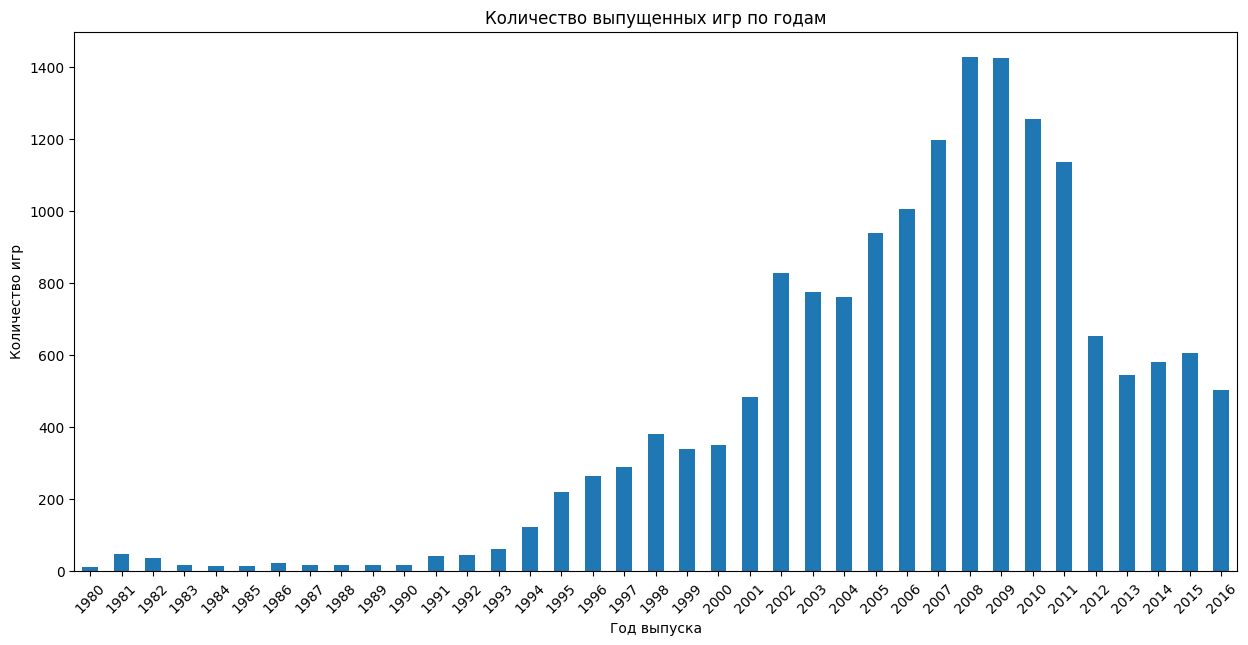

In [21]:
plt.figure(figsize=(15, 7))
game_year.plot(kind='bar')
plt.title('Количество выпущенных игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.xticks(rotation=45);

Первым делом посмотрим на количество выпущенных игр по годам. Видим значительный рост примерно с 1994 года. И спад в 2012. Вероятно, важно анализировать данные с 1994 года

### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Для начала выделим топ-10 платформ по продажам, запишем их в список

In [22]:
top_platform = df.groupby('platform')['all_sales'].sum().sort_values(ascending= False).head(10).index
top_platform

Index(['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps', 'ps4', 'gba', 'psp', '3ds'], dtype='object', name='platform')

Отфильтруем данные только по этим 10 платформам

In [23]:
df_top_pl = df[df['platform'].isin(top_platform)]
df_top_pl

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16436,woody woodpecker in crazy castle 5,gba,2002,platform,0.01,0.00,0.00,0.00,<NA>,NaN,NaN,0.01
16437,score international baja 1000: the official game,ps2,2008,racing,0.00,0.00,0.00,0.00,<NA>,NaN,NaN,0.00
16438,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01
16439,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,<NA>,NaN,NaN,0.01


Построим сводную таблицу по платформам и распределением продаж по годам

In [24]:
df_pl_pivot = df_top_pl.pivot_table(index = 'year_of_release', columns = 'platform', values = 'all_sales', aggfunc = 'sum')
df_pl_pivot

platform,3ds,ds,gba,ps,ps2,ps3,ps4,psp,wii,x360
year_of_release,,,,,,,,,,
1985,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994,NaN,NaN,NaN,6.03,NaN,NaN,NaN,NaN,NaN,NaN
1995,NaN,NaN,NaN,35.96,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,NaN,NaN,94.70,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,NaN,NaN,136.17,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,NaN,NaN,169.49,NaN,NaN,NaN,NaN,NaN,NaN
1999,NaN,NaN,NaN,144.53,NaN,NaN,NaN,NaN,NaN,NaN
2000,NaN,NaN,0.07,96.37,39.17,NaN,NaN,NaN,NaN,NaN
2001,NaN,NaN,61.53,35.59,166.43,NaN,NaN,NaN,NaN,NaN


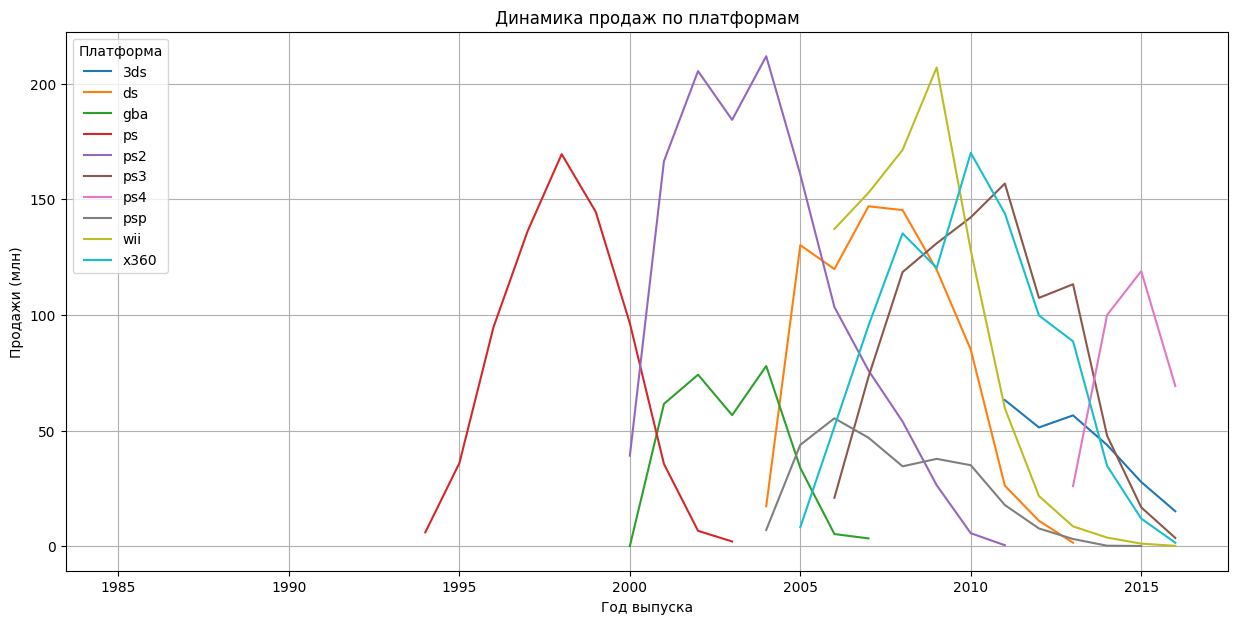

In [25]:
df_pl_pivot.plot(kind='line', figsize=(15, 7))
plt.title('Динамика продаж по платформам')
plt.xlabel('Год выпуска')
plt.ylabel('Продажи (млн)')
plt.grid(True)
plt.legend(title='Платформа');

По данным графикам видно, что почти каждая из топ-10 платформ по продажам живет в среднем 7-10 лет

### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

Рынок платформа динамичный, быстро всё меняется, поэтому для прогнозирования нам нужны актуальные данные, последние несколько лет. Возьмем период с 2013 по 2016

In [26]:
df_new = df[df['year_of_release'] > 2012].reset_index(drop=True)
df_new

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
1,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
2,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,<NA>,NaN,NaN,14.63
3,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,<NA>,NaN,NaN,14.60
4,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
2228,strawberry nauts,psv,2016,adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01
2229,aiyoku no eustia,psv,2014,misc,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01
2230,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01
2231,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01


In [27]:
df_new_pivot = df_new.pivot_table(index = 'year_of_release', columns = 'platform', values = 'all_sales', aggfunc = 'sum')
df_new_pivot

platform,3ds,ds,pc,ps3,ps4,psp,psv,wii,wiiu,x360,xone
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


In [28]:
df_new_pivot.sum(axis=0).sort_values(ascending=False)

platform
ps4     314.14
ps3     181.43
xone    159.32
3ds     143.25
x360    136.80
wiiu     64.63
pc       39.43
psv      32.99
wii      13.66
psp       3.50
ds        1.54
dtype: float64

Лидирует по продажам в 2016 году PS4. Это на тот момент самая актуальная и популярная платформа, продажи игр держатся на очень высоком уровне. Далее идут продажи на PS3, playstation прошлого поколения.Так же всё в порядке и у XOne, это конкурент на тот момент PS4. Правда что у PS4, что у XOne после пикового 2015 года идет падение в 2016. Но это всё равно огромные цифры. Остальные все платформы только падают по продажам

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

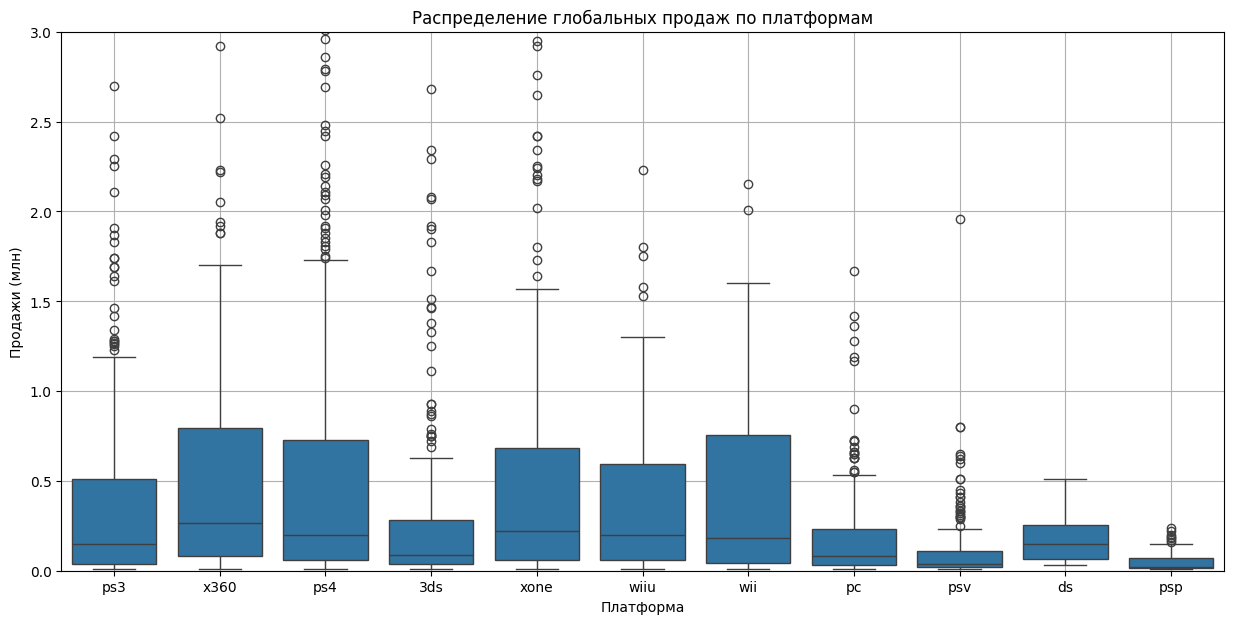

In [29]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df_new, x='platform', y='all_sales')
plt.title('Распределение глобальных продаж по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи (млн)')
plt.grid(True)
plt.ylim(0,3);

Большинство платформ (3DS, PC, PSV, DS, PSP) имеют небольшие "коробки". Значит, что игры на эти платформы продавали в небольшом количестве, без перекосов вверх, стабильно мало. Так же видим, что в коробках медиана сильно левее. Много игр со слабыми продажами.  
6 платформ выбиваются из этого списка (PS3, X360, PS4, XOne, WiiU и Wii):  
- Медиана у этих платформ находится выше, чем у большинства других
- Межквартильный диапазон говорит нам о том, что много игр имело широкий диапазон продаж
- Много выбросов выше — это говорит о наличии игр с очень высокими продажами

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

В качестве популярной платформы возьмем PS3. Она одна из самых современных + ее история "размазана" почти на все года исследуемого периода

In [30]:
df_new_score = df_new.dropna(subset = ['critic_score', 'user_score', 'all_sales'])

Для анализа удалим из датасета пропущенные значения из трех колонок - critic_score, user_score, all_sales. Оставим только PS3

In [31]:
df_new_ps3 = df_new_score[df_new_score['platform'] =='ps3']
df_new_ps3

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
7,call of duty: ghosts,ps3,2013,shooter,4.10,3.63,0.38,1.25,71,2.6,M,9.36
18,fifa 14,ps3,2013,sports,0.78,4.24,0.07,1.37,86,4.3,E,6.46
20,the last of us,ps3,2013,action,2.41,2.18,0.28,0.99,95,9.1,M,5.86
51,assassin's creed iv: black flag,ps3,2013,action,1.33,1.68,0.13,0.57,88,8.1,M,3.71
...,...,...,...,...,...,...,...,...,...,...,...,...
1920,the awakened fate ultimatum,ps3,2014,role-playing,0.00,0.00,0.02,0.00,65,7.3,T,0.02
1921,xblaze: lost memories,ps3,2015,adventure,0.02,0.00,0.00,0.00,63,6.2,M,0.02
1948,battle princess of arcadias,ps3,2013,role-playing,0.00,0.00,0.02,0.00,69,7.9,T,0.02
1986,invizimals: the lost kingdom,ps3,2013,action,0.00,0.02,0.00,0.00,50,5.0,E10+,0.02


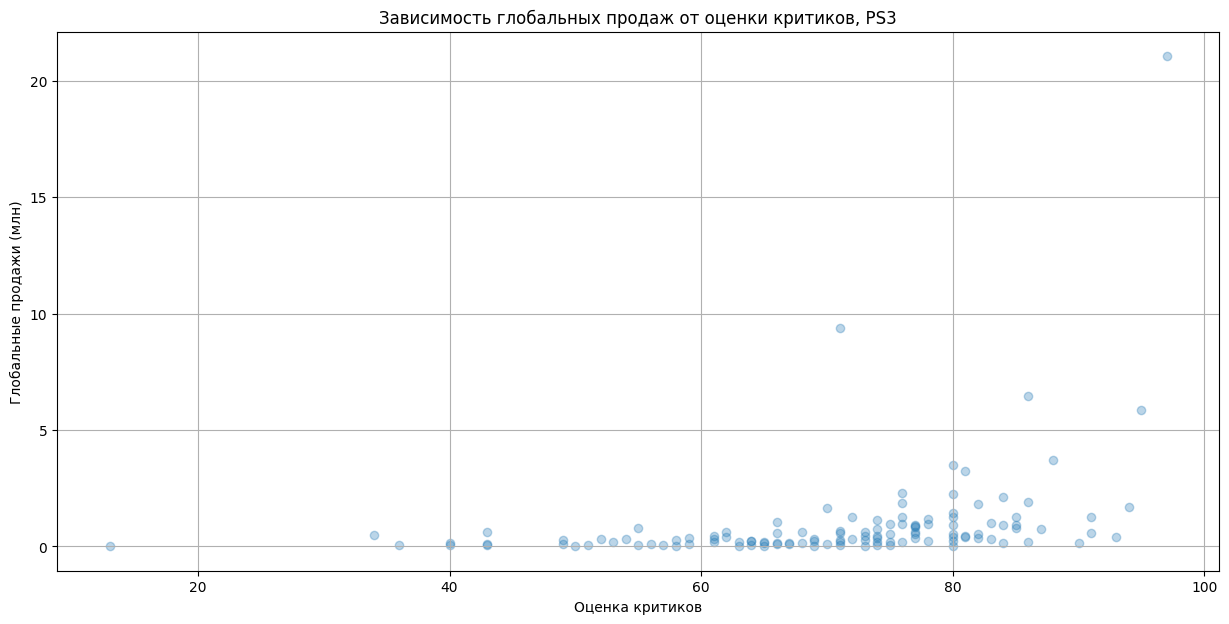

In [32]:
plt.figure(figsize=(15, 7))
plt.scatter(df_new_ps3['critic_score'], df_new_ps3['all_sales'], alpha=0.3)
plt.title('Зависимость глобальных продаж от оценки критиков, PS3')
plt.xlabel('Оценка критиков')
plt.ylabel('Глобальные продажи (млн)')
plt.grid(True)

Как мы видим, зависимость продаж от оценки критиков положительная, причем после оценки в 70 продажи резко идут вверх

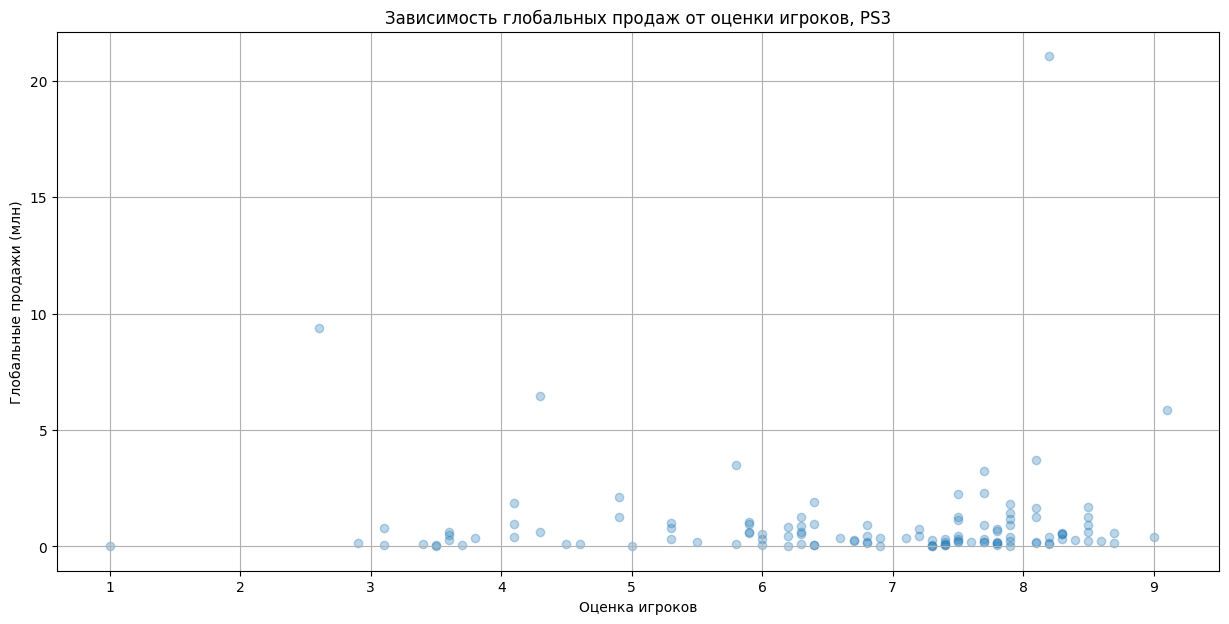

In [33]:
plt.figure(figsize=(15, 7))
plt.scatter(df_new_ps3['user_score'], df_new_ps3['all_sales'], alpha=0.3)
plt.title('Зависимость глобальных продаж от оценки игроков, PS3')
plt.xlabel('Оценка игроков')
plt.ylabel('Глобальные продажи (млн)')
plt.grid(True)

Тут зависимость тоже положительная, но слабее. Несмотря на низкую порой оценку игроков продажи всё равно приличные

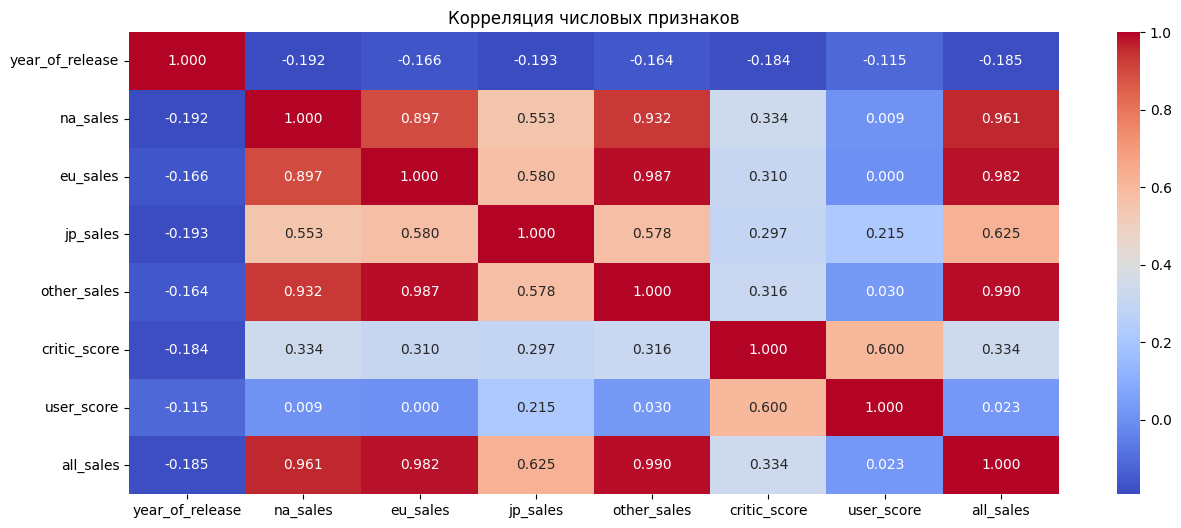

In [34]:
corr1 = df_new_ps3.select_dtypes(include = 'number').corr()

plt.figure(figsize=(15,6))
sns.heatmap(corr1, annot=True, fmt='.3f', cmap='coolwarm')
plt.title('Корреляция числовых признаков');

Подтверждаем корреляцием all_sales с critic_score и user_score. 0.334 и 0.023 соответственно. Положительная связь продаж с оценками критиков. А вот с оценками игроков связи по сути нет

### Соотнесите выводы с продажами игр на других платформах.

Возьмет на проверку еще 2 платформы. Конкурента PS3 - X360. И более новую платформу - PS4

In [35]:
df_new_x360 = df_new_score[df_new_score['platform'] =='x360']

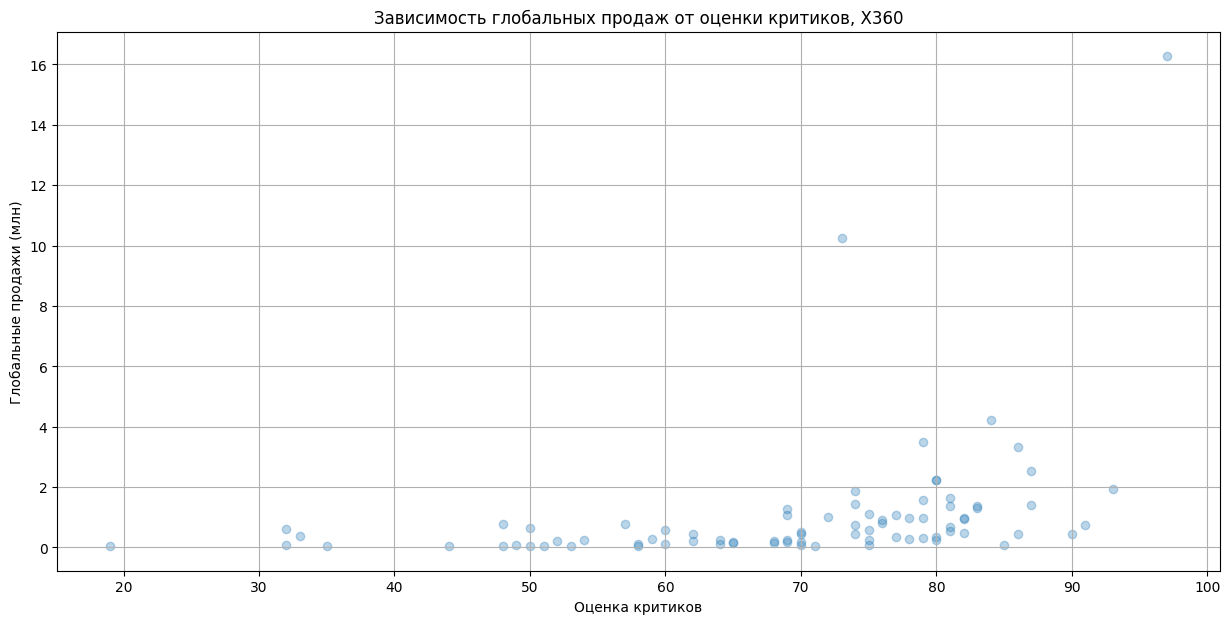

In [36]:
plt.figure(figsize=(15, 7))
plt.scatter(df_new_x360['critic_score'], df_new_x360['all_sales'], alpha=0.3)
plt.title('Зависимость глобальных продаж от оценки критиков, X360')
plt.xlabel('Оценка критиков')
plt.ylabel('Глобальные продажи (млн)')
plt.grid(True)

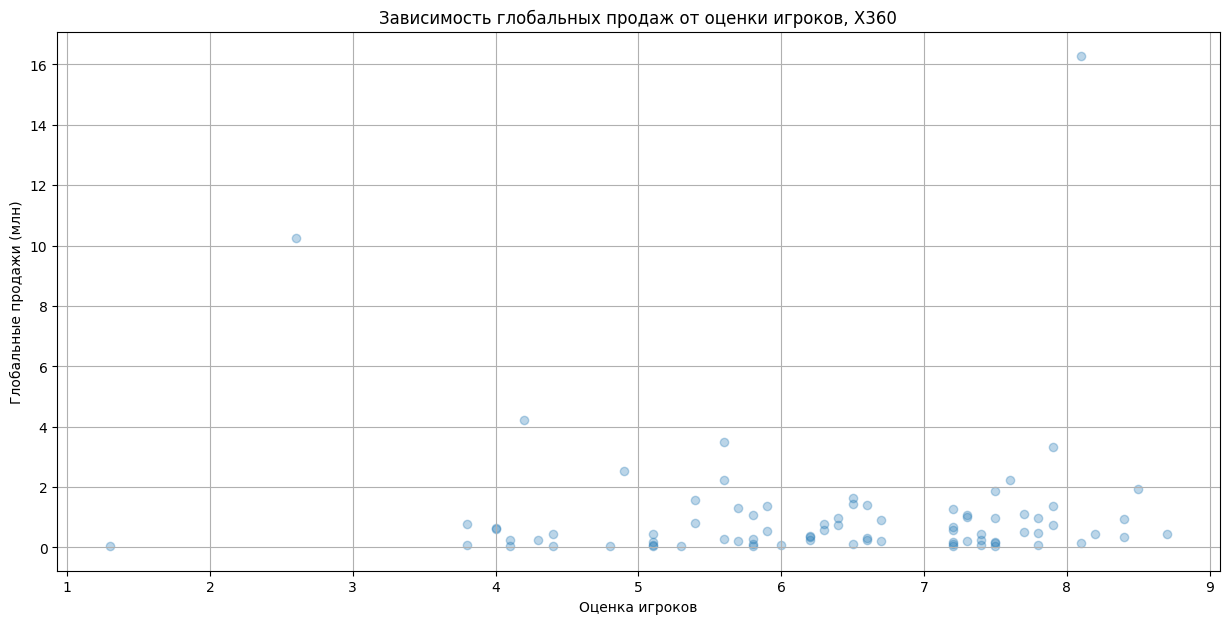

In [37]:
plt.figure(figsize=(15, 7))
plt.scatter(df_new_x360['user_score'], df_new_x360['all_sales'], alpha=0.3)
plt.title('Зависимость глобальных продаж от оценки игроков, X360')
plt.xlabel('Оценка игроков')
plt.ylabel('Глобальные продажи (млн)')
plt.grid(True)

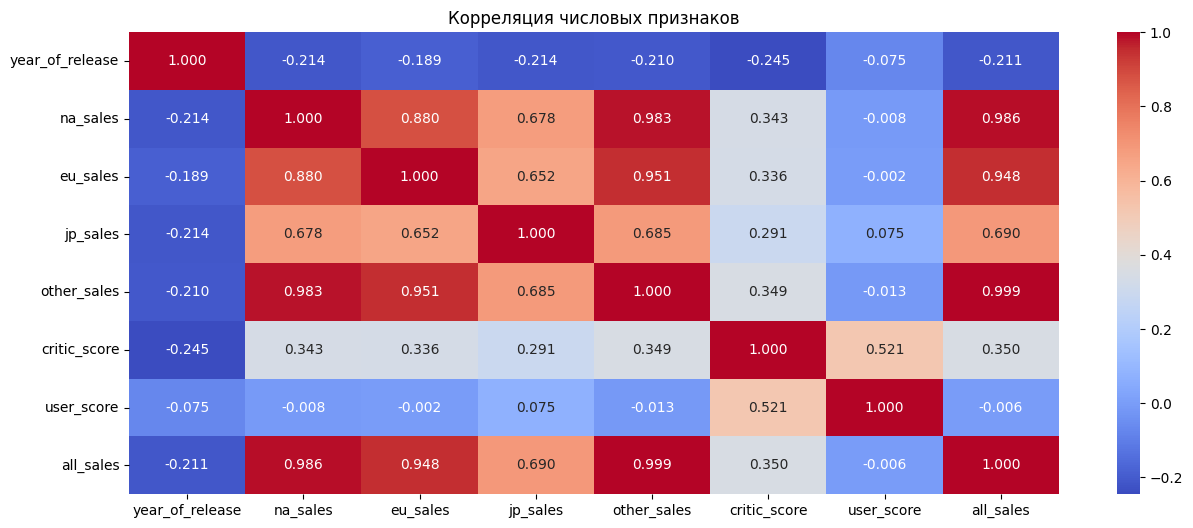

In [38]:
corr2 = df_new_x360.select_dtypes(include = 'number').corr()

plt.figure(figsize=(15,6))
sns.heatmap(corr2, annot=True, fmt='.3f', cmap='coolwarm')
plt.title('Корреляция числовых признаков');

Ситуация аналогичная, корреляция почти не отличается. 0.350 между all_sales и critic_score. А вот между all_sales и user_score отрицательная, правда почти нулевая: -0.006

In [39]:
df_new_ps4 = df_new_score[df_new_score['platform'] =='ps4']

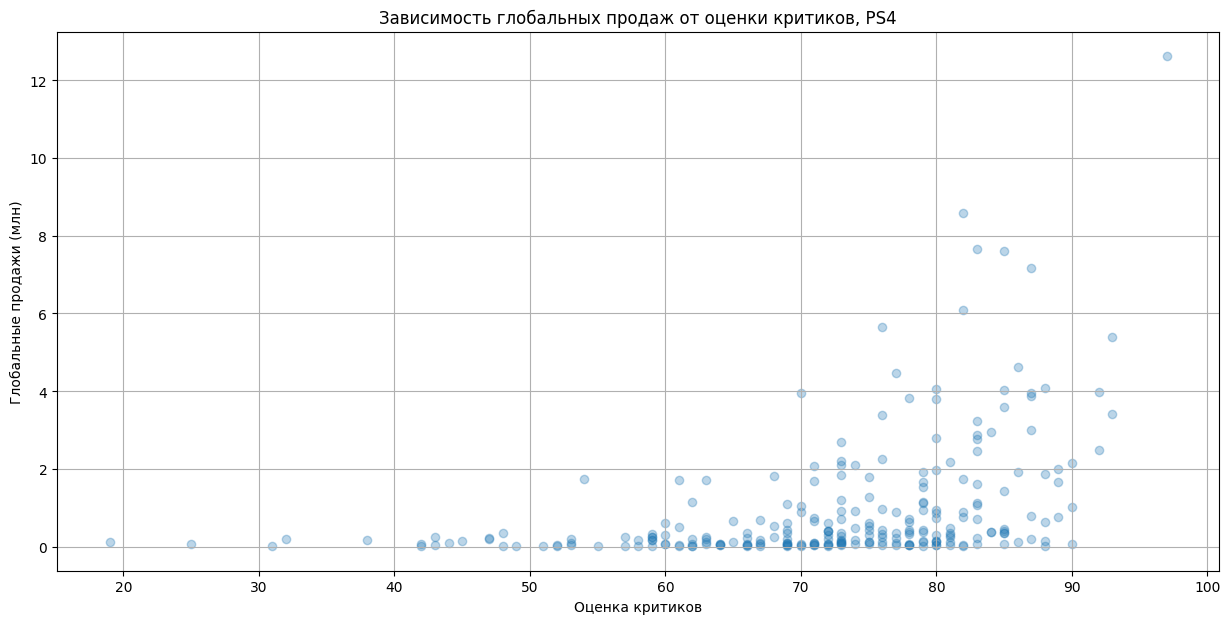

In [40]:
plt.figure(figsize=(15, 7))
plt.scatter(df_new_ps4['critic_score'], df_new_ps4['all_sales'], alpha=0.3)
plt.title('Зависимость глобальных продаж от оценки критиков, PS4')
plt.xlabel('Оценка критиков')
plt.ylabel('Глобальные продажи (млн)')
plt.grid(True)

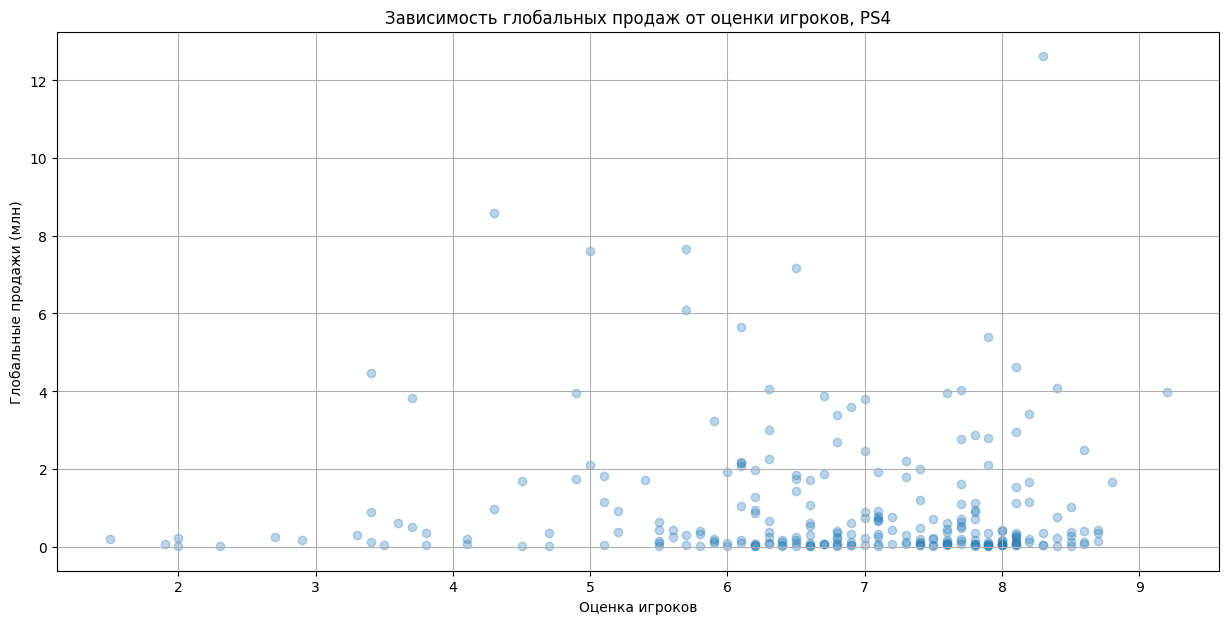

In [41]:
plt.figure(figsize=(15, 7))
plt.scatter(df_new_ps4['user_score'], df_new_ps4['all_sales'], alpha=0.3)
plt.title('Зависимость глобальных продаж от оценки игроков, PS4')
plt.xlabel('Оценка игроков')
plt.ylabel('Глобальные продажи (млн)')
plt.grid(True)

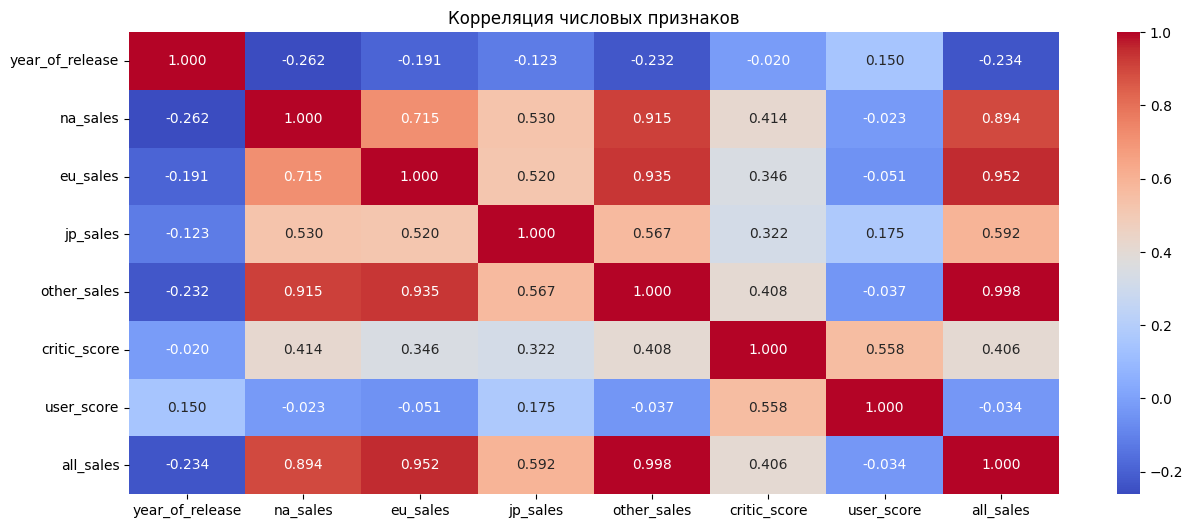

In [42]:
corr3 = df_new_ps4.select_dtypes(include = 'number').corr()

plt.figure(figsize=(15,6))
sns.heatmap(corr3, annot=True, fmt='.3f', cmap='coolwarm')
plt.title('Корреляция числовых признаков');

In [43]:
df_new_ps4.shape

(249, 12)

корреляция между all_sales и critic_score схожая с остальными платформами, 0.406. А вот между all_sales и user_score всего -0.034. То есть ее почти нет


### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Берем актуальный период для анализа ( с 2013 по 2016 год)

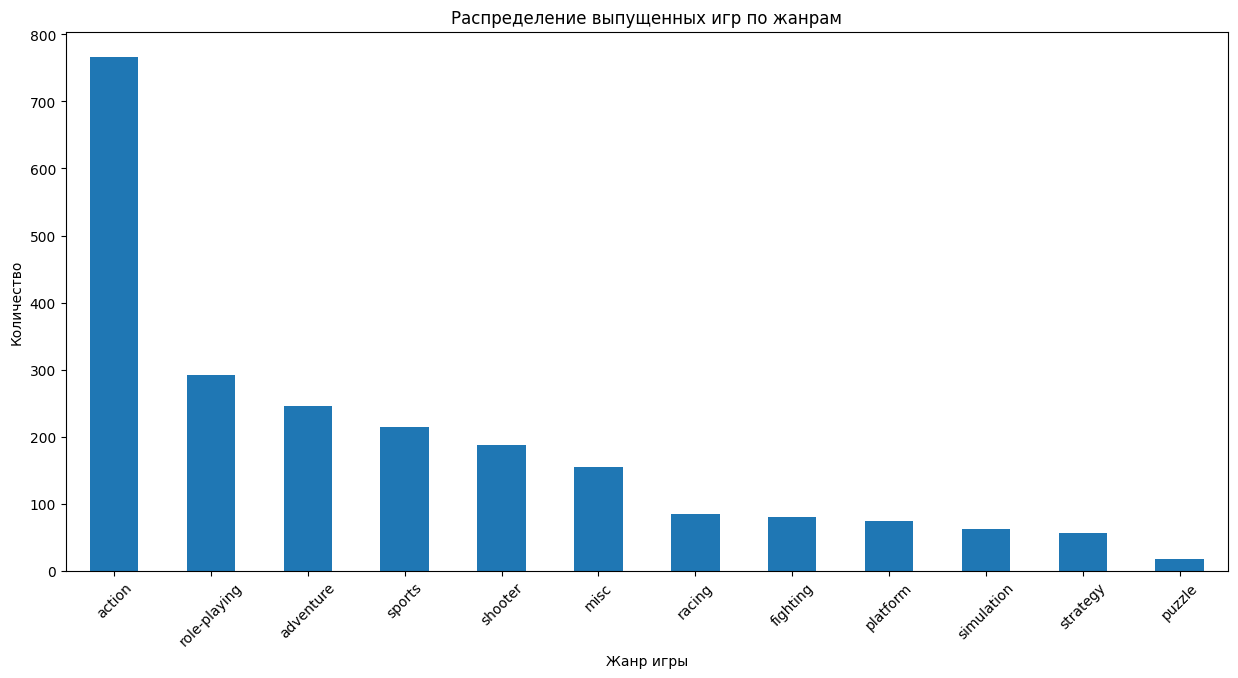

In [44]:
plt.figure(figsize=(15,7))
df_new['genre'].value_counts().plot(kind = 'bar')
plt.xticks(rotation=45)
plt.xlabel('Жанр игры')
plt.ylabel('Количество')
plt.title('Распределение выпущенных игр по жанрам');

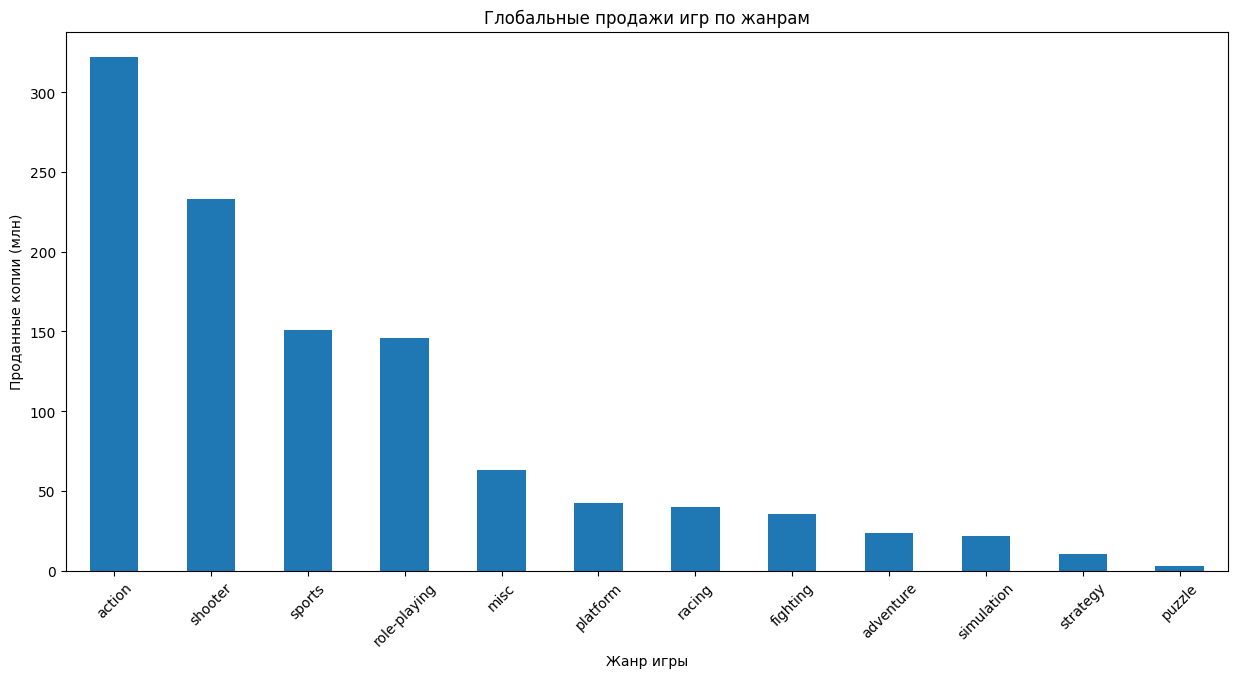

In [45]:
genre_sales = df_new.groupby('genre')['all_sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(15,7))
genre_sales.plot(kind = 'bar')
plt.xticks(rotation=45)
plt.xlabel('Жанр игры')
plt.ylabel('Проданные копии (млн)')
plt.title('Глобальные продажи игр по жанрам');

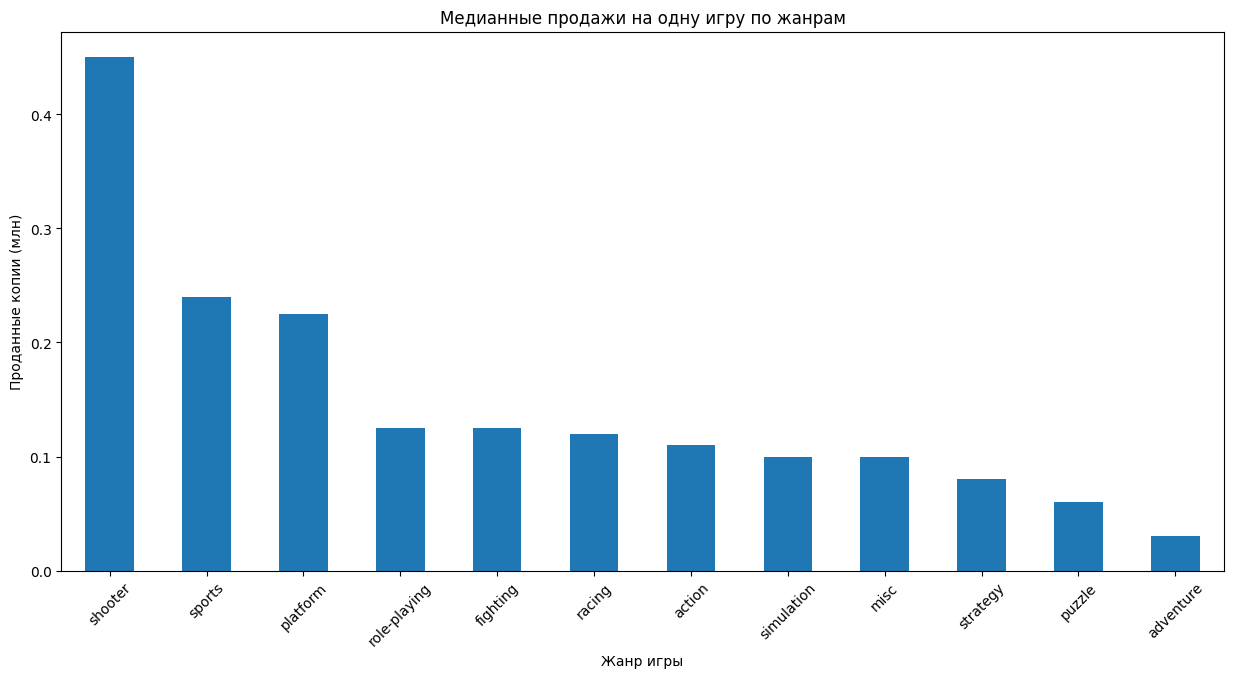

In [46]:
genre_sales_mean = df_new.groupby('genre')['all_sales'].median().sort_values(ascending=False)
plt.figure(figsize=(15,7))
genre_sales_mean.plot(kind = 'bar')
plt.xticks(rotation=45)
plt.xlabel('Жанр игры')
plt.ylabel('Проданные копии (млн)')
plt.title('Медианные продажи на одну игру по жанрам');

Мы видим, что за период с 2013 по 2016 года больше всего выпущено игр в жанре Action. Не удивительно, что этот же жанр на первом месте по прибыли. Однако нас интересует медианное значение продажи одной игры для каждого жанра. И тут мы видим, что наибольшая отдача идет у жанра Shooter. Далее идет Sports и Platform. А вот Action затерялся где-то в середине, видимо в данном жанре очень много проходных игр со слабыми продажами

**В данном разделе мы:**
- посмотрели на график выпускаемости игр по годам. Большой прирост начался после 1994 года, а после 2012 был резкий спад.
- проанализировали топ-10 игровых платформ по играм. Увидели цикл их жизни - в среднем это 7-10 лет.
- Лидирует по продажам в 2016 году PS4. Это на тот момент самая актуальная и популярная платформа, продажи игр держатся на очень высоком уровне. Далее идут продажи на PS3, playstation прошлого поколения.Так же всё в порядке и у XOne.
- 6 платформ имеют приличные продажи, есть приличное количество выборосов у PS3, X360, PS4, XOne, WiiU и Wii
- соотнесли корреляцию между продажами и оценками (как критиков, так и пользователей). Есть положительная корреляция между оценками критиков и продажами
- Жанры Shooter, Action и Sports лидируют по различным метрикам. Shooter лидирует по медианной продаже на одну игру. Зато Action лидирует по общим продажам

<a id="портрет"></a>
## Составьте портрет пользователя каждого региона

### Определите для пользователя каждого региона (NA, EU, JP): Самые популярные платформы (топ-5). Опишите различия в долях продаж. Самые популярные жанры (топ-5). Поясните разницу. Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [47]:
regions = ['na_sales', 'eu_sales', 'jp_sales']

In [48]:
for region in regions:
    print(f'\nРегион: {region}')
    top_pl = df_new.groupby('platform')[region].sum().sort_values(ascending=False).head(5)
    print('Топ-5 платформ:\n', top_pl)


Регион: na_sales
Топ-5 платформ:
 platform
ps4     108.74
xone     93.12
x360     81.66
ps3      63.50
3ds      38.20
Name: na_sales, dtype: float64

Регион: eu_sales
Топ-5 платформ:
 platform
ps4     141.09
ps3      67.81
xone     51.59
x360     42.52
3ds      30.96
Name: eu_sales, dtype: float64

Регион: jp_sales
Топ-5 платформ:
 platform
3ds     67.81
ps3     23.35
psv     18.59
ps4     15.96
wiiu    10.88
Name: jp_sales, dtype: float64


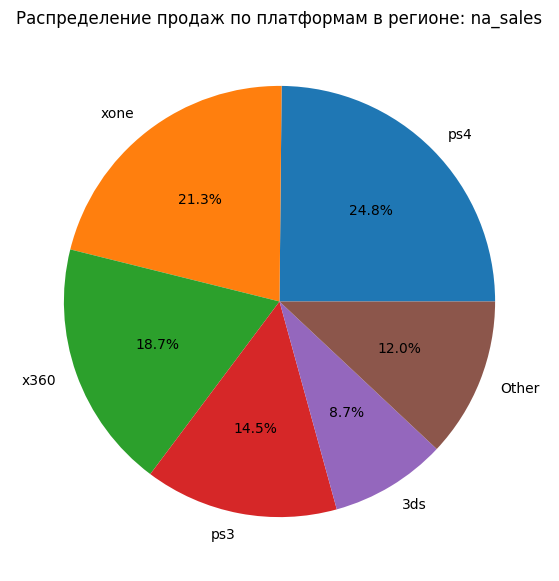

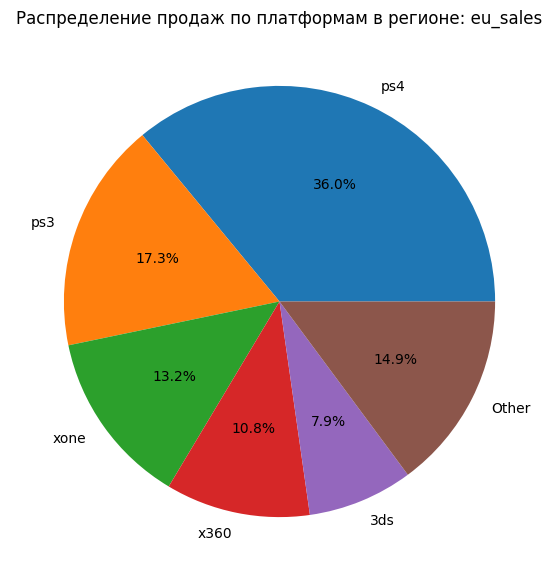

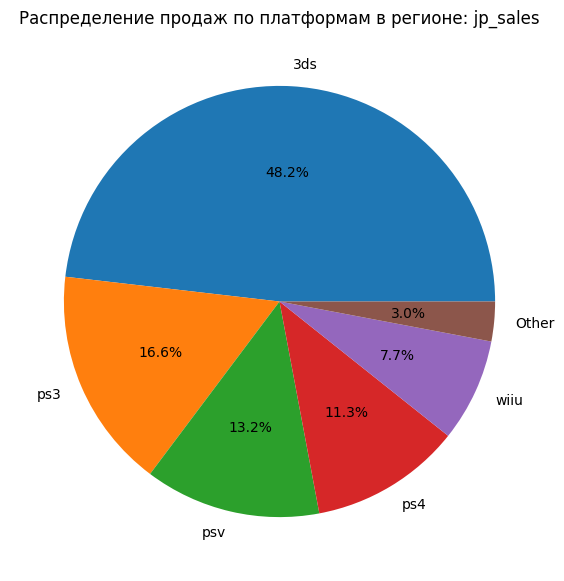

In [49]:
for region in regions:
    pl = df_new.groupby('platform')[region].sum()
    top_pl = pl.sort_values(ascending=False).head(5)
    other = pl.sum() - top_pl.sum()
    top_pl['Other'] = other

    plt.figure(figsize=(15, 7))
    plt.pie(top_pl, labels=top_pl.index, autopct='%1.1f%%')
    plt.title(f'Распределение продаж по платформам в регионе: {region}')

In [50]:
for region in regions:
    print(f'\nРегион: {region}')
    top_genres = df_new.groupby('genre')[region].sum().sort_values(ascending=False).head(5)
    print('Топ-5 жанров:\n', top_genres)


Регион: na_sales
Топ-5 жанров:
 genre
action          126.05
shooter         109.74
sports           65.27
role-playing     46.40
misc             27.49
Name: na_sales, dtype: float64

Регион: eu_sales
Топ-5 жанров:
 genre
action          118.13
shooter          87.86
sports           60.52
role-playing     36.97
racing           20.19
Name: eu_sales, dtype: float64

Регион: jp_sales
Топ-5 жанров:
 genre
role-playing    51.04
action          40.49
misc             9.20
fighting         7.65
shooter          6.61
Name: jp_sales, dtype: float64


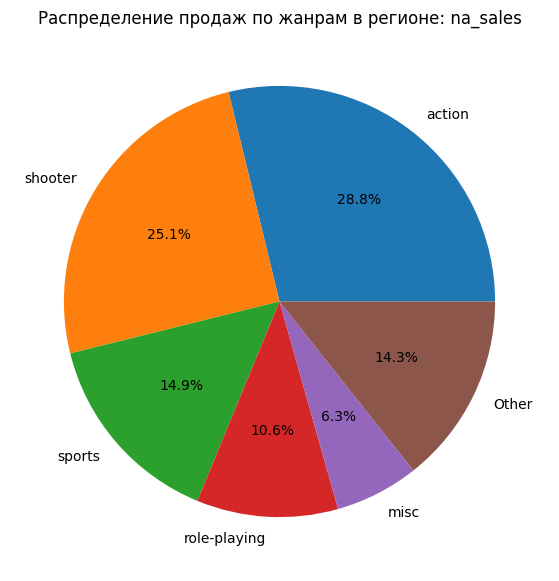

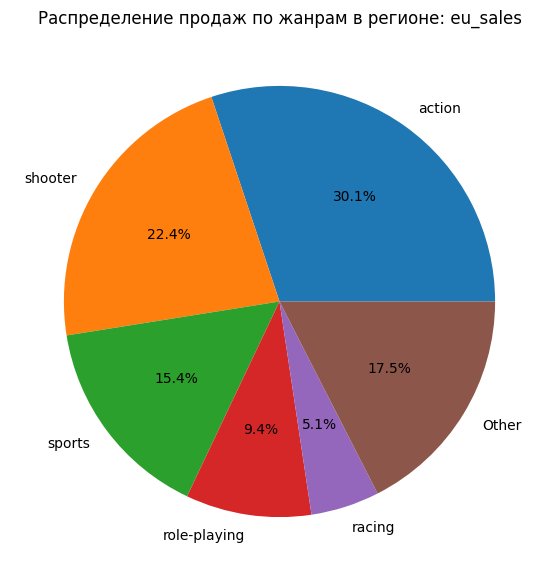

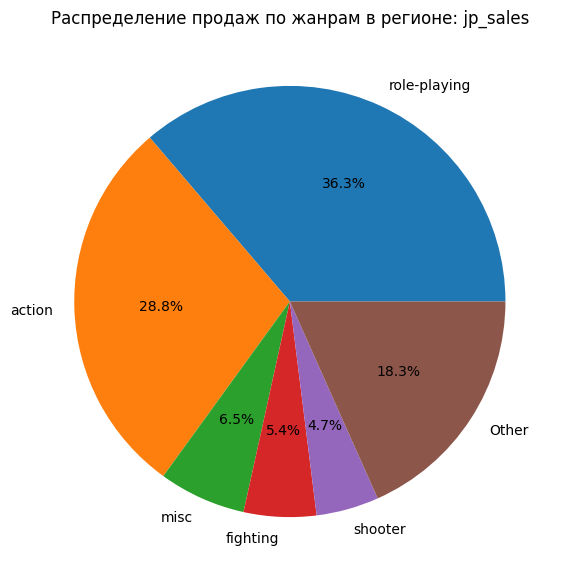

In [51]:
for region in regions:
    gen = df_new.groupby('genre')[region].sum()
    top_gen = gen.sort_values(ascending=False).head(5)
    other = gen.sum() - top_gen.sum()
    top_gen['Other'] = other

    plt.figure(figsize=(15, 7))
    plt.pie(top_gen, labels=top_gen.index, autopct='%1.1f%%')
    plt.title(f'Распределение продаж по жанрам в регионе: {region}')

Заменим рейтинг с пропусками на рейтинг E (Everyone). Вероятно, когда в столбце рейтинга есть пропуск, значит игра для всех

In [52]:
df_new['rating'] = df_new['rating'].fillna('E')
df_new.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
1,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
2,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,<NA>,NaN,E,14.63
3,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,<NA>,NaN,E,14.60
4,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97,8.3,M,12.62


In [53]:
for region in regions:
    print(f'\nРегион: {region}')
    top_genres = df_new.groupby('rating')[region].sum().sort_values(ascending=False).head(5)
    print('Рейтинг:\n', top_genres)


Регион: na_sales
Рейтинг:
 rating
E       168.47
M       165.21
E10+     54.24
T        49.79
Name: na_sales, dtype: float64

Регион: eu_sales
Рейтинг:
 rating
E       162.27
M       145.32
E10+     42.69
T        41.95
Name: eu_sales, dtype: float64

Регион: jp_sales
Рейтинг:
 rating
E       100.19
T        20.59
M        14.11
E10+      5.89
Name: jp_sales, dtype: float64


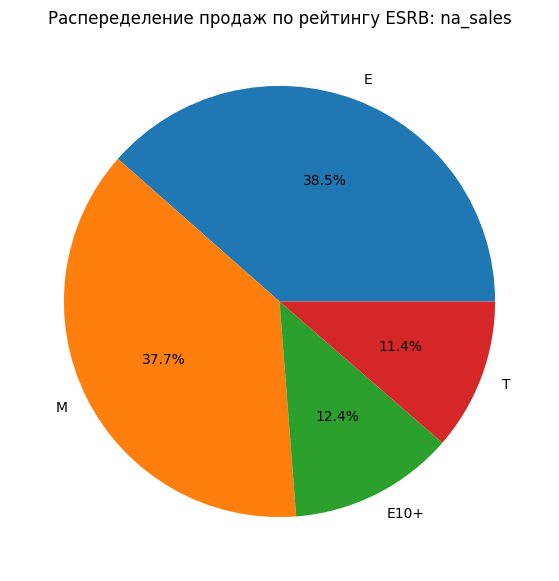

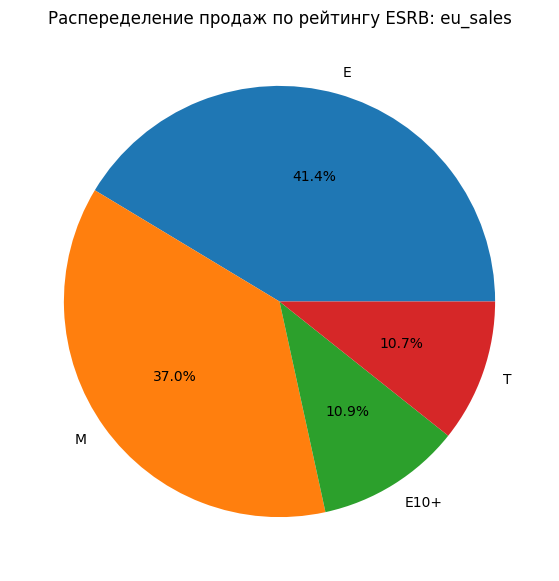

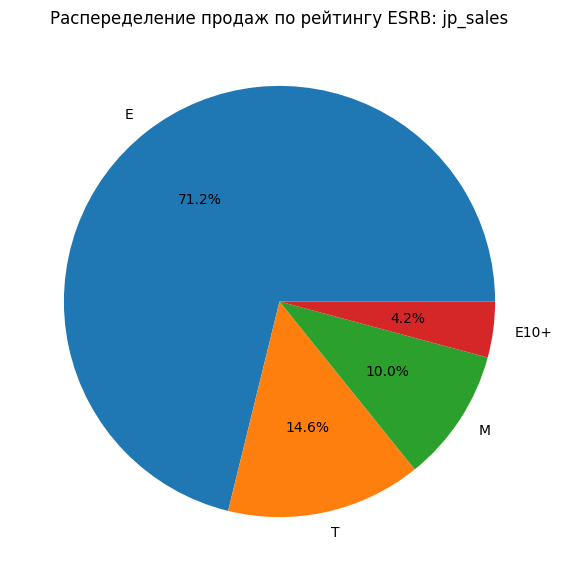

In [54]:
for region in regions:
    rat = df_new.groupby('rating')[region].sum().sort_values(ascending=False).head(5)
    plt.figure(figsize=(15,7))
    plt.pie(rat, labels = rat.index, autopct = '%1.1f%%')
    plt.title(f'Распеределение продаж по рейтингу ESRB: {region}')

Мы сравнили три региона - NA, EU и JP по продажам игр\
**Выводы:**
1) В Америке (NA) и Европе (EU) лидирует по продажам явно PS4. Далее идут PS3, XOne и X360. А вот в Японии почти 50% рынка занимает 3DS.
2) По жанрам в Америке и Европе примерно одинаково - продажи игр жанра Action, Shooter и Sports на первых трех местах. Занимают почти 70% рынка. А вот в Японии преобладает другой жанр - Role-Playing впереди всех, далее Action.
3) В Америке и Европе преобладают два возрастных рейтинга - Е (для всех) и М (От 17 лет). А вот в Японии более 70% рынка это E. Так как рейтинг ESRB - американский, а не японский, то и большинство игр в Японии не имеют никакого статуса по этому рейтингу.

<a id="гипотезы"></a>
##  Проверьте гипотезы
### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;


**Нулевая гипотеза:** средний пользовательский рейтинг игр платформ Xbox One и PC одинаковый\
**Альтернативная гипотеза:** средний пользовательский рейтинг игр платформ Xbox One и PC различаются

In [55]:
df_user_xone = df_new[df_new['platform'] == 'xone']['user_score'].dropna()
df_user_pc = df_new[df_new['platform'] == 'pc']['user_score'].dropna()

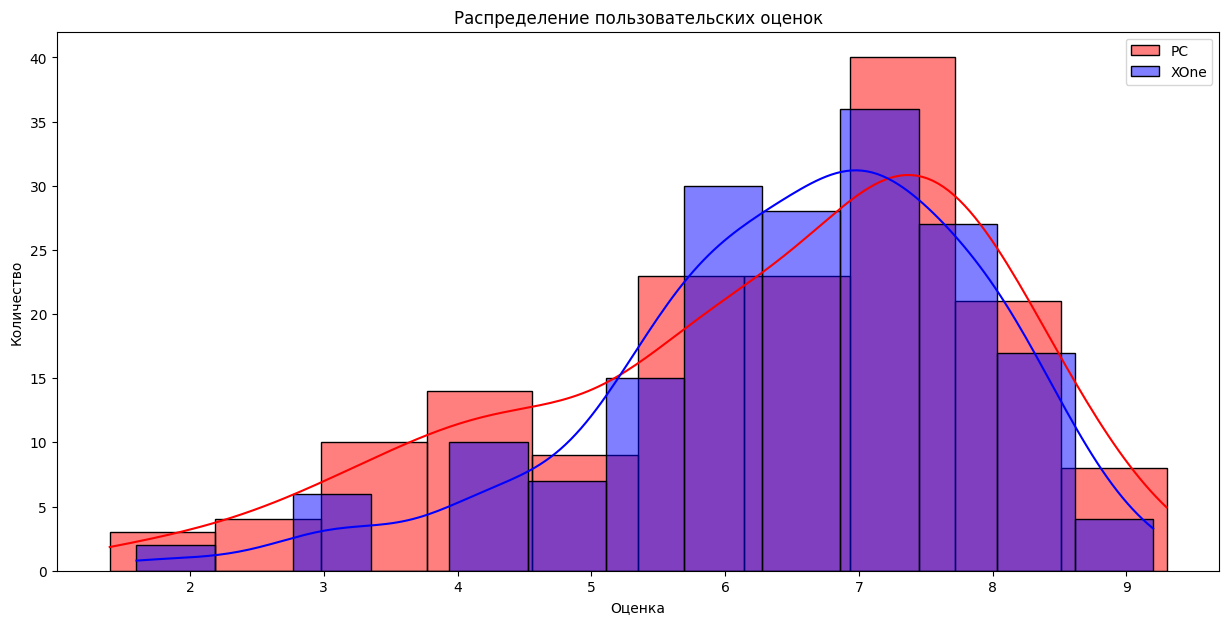

In [56]:
plt.figure(figsize=(15,7))
sns.histplot(df_user_pc, kde=True, label='PC', color='red')
sns.histplot(df_user_xone, kde=True, label='XOne', color='blue')
plt.title('Распределение пользовательских оценок')
plt.legend()
plt.xlabel('Оценка')
plt.ylabel('Количество');

In [57]:
print(st.ttest_ind(df_user_xone, df_user_pc))
results = st.ttest_ind(df_user_xone, df_user_pc)
print('p-значение:', results.pvalue)
if results.pvalue < 0.05:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

TtestResult(statistic=1.4788255981357277, pvalue=0.14012658403611647, df=335.0)
p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


С большой долей вероятности средние пользовательские рейтинги платформ XOne и PC не имеют статистически значимых отличий, так как p-value больше 0.05

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


**Нулевая гипотеза:** средний пользовательский рейтинг игр жанров Action и Sports одинаковый\
**Альтернативная гипотеза:** средний пользовательский рейтинг игр жанров Action и Sports различаются

In [58]:
df_user_action = df_new[df_new['genre'] == 'action']['user_score'].dropna()
df_user_sport = df_new[df_new['genre'] == 'sports']['user_score'].dropna()

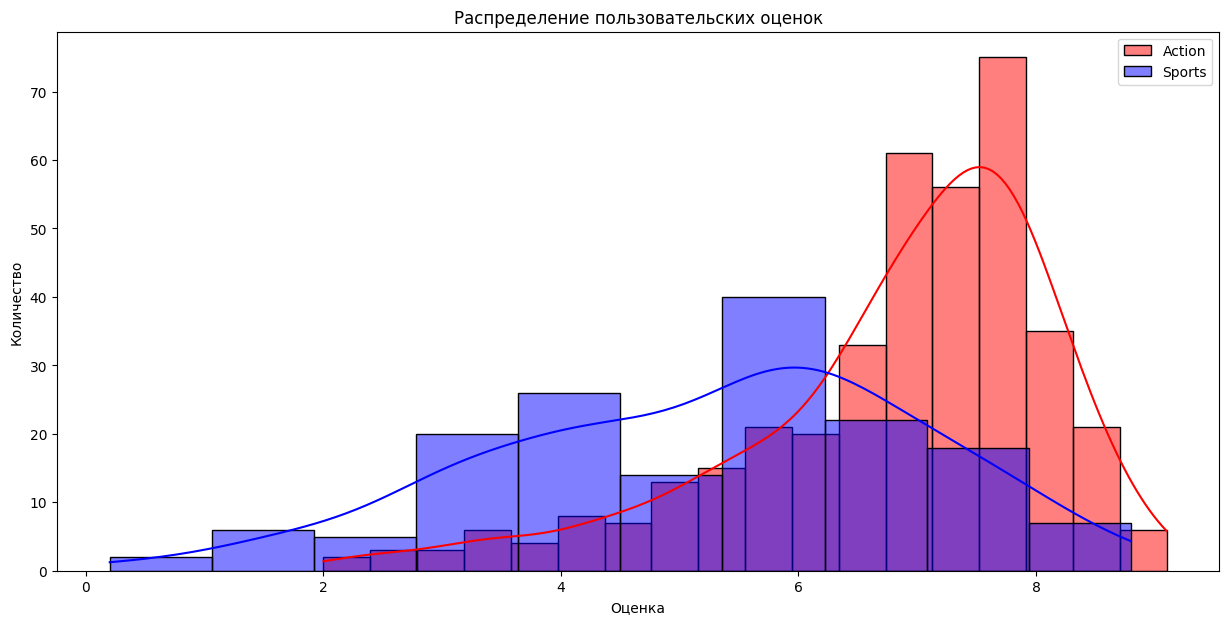

In [59]:
plt.figure(figsize=(15,7))
sns.histplot(df_user_action, kde=True, label='Action', color='red')
sns.histplot(df_user_sport, kde=True, label='Sports', color='blue')
plt.title('Распределение пользовательских оценок')
plt.legend()
plt.xlabel('Оценка')
plt.ylabel('Количество');

Зададим пороговое значение p-value не 5%, а возьмем медицинское значение - 1%.

In [60]:
print(st.ttest_ind(df_user_action, df_user_sport))
results = st.ttest_ind(df_user_action, df_user_sport)
print('p-значение:', results.pvalue)
alpha = 0.01
if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

TtestResult(statistic=11.535100577928208, pvalue=1.0517832389140023e-27, df=547.0)
p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


Независимо от того, p-value 5% у нас или 1%, смотря на p-значение (которое сильно ниже 0.0000...), у нас есть основания утверждать, что средний пользовательский рейтинг игр жанров Action и Sports сильно различаются

В обоих случаям мы за нулевую гипотезу брали равенство двух групп. В обеих гипотезах обе выборки независимы друг от друга и достаточно большие. Тут подойдет двусторонний t-test Стьюдента

<a id="вывод"></a>
## Вывод

**Общий вывод:**
- был загружен файл с данными о продажах игр, оценки пользователей и экспертов, жанры и платформы. Были изменены типы данных, переименованы колонки, обработаны пропуски, где это возможно. Удалены неявные дубликаты.
- Был просмотрен график выпуска игр. Скачок произошел в 1994 году и достиг пика в 2008 году. После 2012 года идет резкий спад.
- построили график топ-10 платформ по продажам игр. Увидели закономерность, что обычно цикл жизни состовляет 7-10 лет.
- нашли 2 платформы, которые стремительно взлетают - это PS4 и Xone. Продажи игр уже на высоком уровне, есть игры, продажи которых на эти платформы можно считать аномально высокими, из-за чего среднее и медиана сильно отличаются. Также продажи на PS3 остаются высокими.
- проверили корреляцию между продажами игр и оценками (критиков и игроков). Связи между продажами и оценкой игроков почти нет. А вот оценки критиков коррелируют хорошо с продажами. Коэффициент корреляции тут коллеблется в среднем от 0.3 до 0.4.
- жанр Action самый продаваемый. И его больше всего выпускают на рынке. Однако по медианным продажам одной игры определенного жанра лучше всего чувствует себя Shooter. Action же находится в середине списка
- сравнили тенденции игроков из разных регионов - Америка, Европа, Япония. Во многом пристрастия американцев и европейцев схожи (Action, Sport, Shooter на приставках PS4, XOne и более ранними моделями), а вот японские предпочтения где играть, во что играть совсем другие - это приставка 3DS и игры Role-Playing, Action. Так же выявили, что возрастной рейтинг у большинства японских игр отсутствует по системе ESRB.
- проверили 2 гипотезы: есть основания утверждать, что оценки игроков на платформах PC и Xone не отличаются, а вот оценки игроков по жанрам Action и Sport имеют различия.

По итогам исследования советовал бы обратить внимание на 2 популярные платформы - PS4 и XOne. Так же обратил бы внимание на график - медианные продажи на одну игру по жанрам. Хорошо видно, какие игры лучше покупают игроки. Так же стоит обратить внимание на то, в каком регионе настроены работать наши маркетологи. В зависимости от региона различаются предпочтения игроков - во что играть и на какой приставке